In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [ ]:
hp = pd.read_csv('/content/train.csv')
hp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print(hp)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
hp.shape

(1460, 81)

In [ ]:
hp.columns.get_loc('SalePrice')

80

In [ ]:
print(hp.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
hp_X = hp.iloc[:,[4,47,48,49,50,51]]
hp_y = hp.iloc[:,-1]

In [ ]:

# hp_X_df = pd.DataFrame(hp_X)
# hp_clean = hp[['SalePrice']].join(hp_X_df).dropna()
# hp_X = hp_clean.iloc[:, :-1].values
# # print(hp_X)
# hp_X_df.dropna(inplace = True)
# hp_X = hp_X_df.to_numpy()
# hp_y = hp('SalePrice')
# hp_X_df.dropna(inplace = True)

In [ ]:
# hp_X = hp_clean.iloc[:,:-1].values
# hp_y = hp_clean.iloc[:, -1].values

In [ ]:
hp_y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
hp_X_train,hp_X_test,hp_y_train,hp_y_test = train_test_split( hp_X,hp_y,test_size = 0.1,random_state = 42)
print("hp_X_train shape:", hp_X_train.shape)
print("hp_y_train shape:", hp_y_train.shape)
print("hp_X_test shape:", hp_X_test.shape)
print("hp_y_test shape:", hp_y_test.shape)

hp_X_train shape: (1314, 6)
hp_y_train shape: (1314,)
hp_X_test shape: (146, 6)
hp_y_test shape: (146,)


In [ ]:
model = linear_model.LinearRegression()
model.fit(hp_X_train, hp_y_train)

LinearRegression()

In [ ]:
hp_y_pred = model.predict(hp_X_test)

In [ ]:
print("Mean squared error is :" , mean_squared_error(hp_y_test,hp_y_pred))

Mean squared error is : 4638097823.05468


In [ ]:
print("weights: ",model.coef_) #tan theta
print("Intercept",model.intercept_)

weights:  [ 1.22436025e+00  3.44862935e+04  9.14341370e+03  7.76871188e+04
  3.42832865e+04 -6.48624176e+03]
Intercept 35955.67356950906


In [ ]:
hp_y_test

,SalePrice
892,154500
1105,325000
413,115000
522,159000
1036,315500
...,...
526,132000
101,178000
1092,136500
411,145000


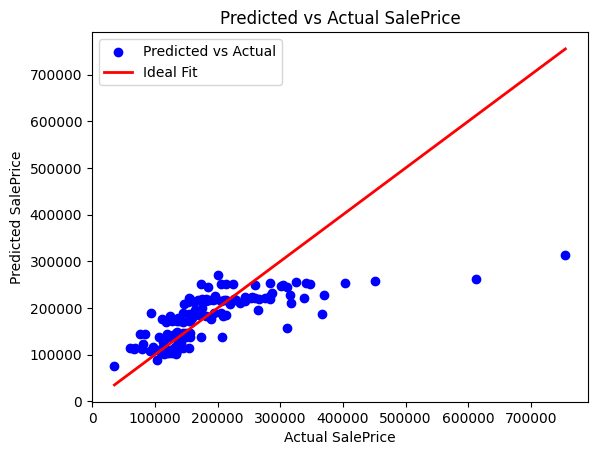

In [ ]:
# Plotting predicted vs actual SalePrice
plt.scatter(hp_y_test, hp_y_pred, color="blue", label="Predicted vs Actual")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice")
plt.plot([hp_y_test.min(), hp_y_test.max()], [hp_y_test.min(), hp_y_test.max()], color="red", lw=2, label="Ideal Fit")  # Perfect prediction line
plt.legend()
plt.show()


In [ ]:
print("Training set size:", len(hp_X_train))
print("Test set size:", len(hp_X_test))


Training set size: 1314
Test set size: 146


In [ ]:
model.fit(hp_X_train, hp_y_train)
train_score = model.score(hp_X_train, hp_y_train)
test_score = model.score(hp_X_test, hp_y_test)

print("Training Score:", train_score)
print("Test Score:", test_score)


Training Score: 0.45265883952905284
Test Score: 0.49236284642271466


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions
hp_y_pred_train = model.predict(hp_X_train)
hp_y_pred_test = model.predict(hp_X_test)

# Calculate MAE and MSE
print("Train MAE:", mean_absolute_error(hp_y_train, hp_y_pred_train))
print("Test MAE:", mean_absolute_error(hp_y_test, hp_y_pred_test))
print("Train MSE:", mean_squared_error(hp_y_train, hp_y_pred_train))
print("Test MSE:", mean_squared_error(hp_y_test, hp_y_pred_test))


Train MAE: 39938.47054423046
Test MAE: 41422.11275947353
Train MSE: 3279609184.43988
Test MSE: 4638097823.05468


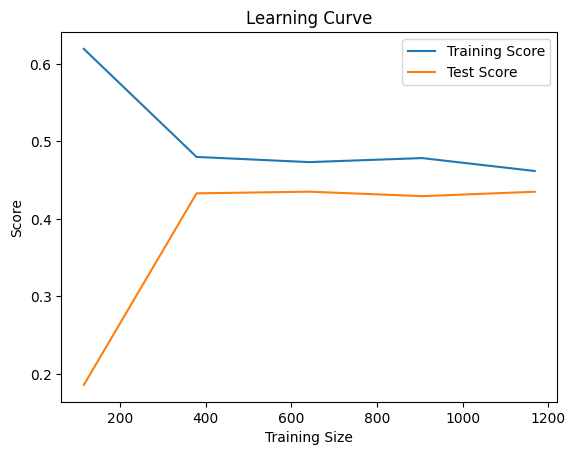

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, hp_X, hp_y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Test Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()
